<a href="https://colab.research.google.com/github/mamuncseru/analysis_on_epileptic_seizure_bonn_dataset/blob/main/Machine_Learning_Algorithms_for_Epileptic_Seizures_on_Bonn_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro of this Notebook

The goal of this research is to use various machine learning algorithms to diagnose epileptic seizures. The frequency components of the EEG are extracted for this purpose using the discrete wavelet transform (DWT) and parametric approaches based on the autoregressive (AR) model. Both of these methods are used as input to machine learning classification algorithms such as Artificial Neural Networks (ANN), Naive Bayesian, k-Nearest Neighbor (k-NN), Support Vector Machines (SVM), Logistic Regression, and Principal Component Analysis. According to test processing of both DWT and AR as feature extraction for recognition of epileptic episodes in EEG, the results reveal that k-NN, ANN, and SVM were the most efficient methods.

## Introduction of Epilepsy

Epilepsy is a serious brain condition that is a worldwide neurological disorder. It is a clinical outcome of aberrant neurological electrical discharge of the brain. The most common positive signs and symptoms of a brain abnormality are epileptic seizures, and epilepsy is one of the most prevalent primary brain illnesses. The most common causes of epilepsy are vascular reasons, traumatic causes, infections and brain tumors, dietary deficiencies, pyridoxine deficiency, and calcium metabolism abnormalities. For improved understanding of the mechanisms generating epileptic diseases, study is required in order to diagnose epilepsy. The electroencephalogram [EEG] is used to diagnose and treat neurophysiologic diseases. The EEG is critical for accurately classifying different types of epilepsy.


## Background Study (Theoritical)

The goal of this research is to use engineering to help in the diagnosis of epilepsy. Thus, modified discrete wavelet and auto regressive models are used to diagnose epileptic seizures using EEG signals. Following these changes, the extracted data is used as input for techniques such as back-propagation, Naive Bayesian, k-Nearest Neighbor (k-NN), Support Vector Machine (SVM), ANN, Logistic Regression, and Principal Component Analysis.


## EEG Data Recording

EEG signals are separated into α, β, γ and θ spectral components and provide a wide range of frequency components. EEG spectrum contains some characteristic waveforms that fall primarily within four frequency bands as follows: δ(0.5-4Hz), θ(4-8Hz), α(8-13Hz) and β(13-30Hz). 

EEG data set has acquired different age groups in this study. They are known epileptic with uncontrolled seizures and are admitted to the neurology department of the Medical Faculty Hospital of Dicle University. Fo this system LabView pro- gramming language has been used and the EEG data used in 400 people who received 200 of them are epilepsy and with 200 of them are normal. Data set represents of signals belong to several healthy and epileptic patients. The EEG signals that are contained by PCI-MIO 16E DAQ card system that provides real time processing and is a data bus of computer, signal processor and personal computer. 

EEG signals are to ensure the accuracy of diagnosing disease that usually is taken 8-10 hours in the form of records. EEG signals are used in section and 23.6 seconds, 173Hz sampling frequency is illustrated with international 10-20 eletrode placement system according to the dat acollected, 12-bit analog-digital conversion after the samples are recorded subsequently. 

Data can be passed through the filter 0.53-40Hz band-pass, the EEG in the presence of clinical interest for focusing range is provided. The EEG data used in our study were downloaded from 24h EEG recorded from both epileptic patients and normal subjects.

The following bipolar EEG channels were selected for analysis: F7-C3, F8-C4, T5-O1 and T6-O2. In order to assess the performance of the classifier, we selected 500 EEG segments containing spike and wave complex, artifacts and background normal EEG.


## Discrete Wavelete Transform

Wavelet transform is more advantageous spectral analyze method that other spectral analyze methods on non-stationary signals. Because the wavelete transform method changes large low-frequency, high-frequency that is narrow for the window size. So, the entire frequency range can be achieved in the optimum time-frequency resolution.

Continuous and discrete wavelete transform is analyzed in the scale and variation of parameters due to the continuous wavelet coefficients for each scale is difficult and time consuming. For this reason, discrete wavelete transform is used more often thanthses non-stationary signals. Wavelet scaleis divided into a number of points for x[n] process as seen in Fig.2 that is called multi-resolution decomposition. it is important that is selected appropriate wavelete decomposition level, the number of detection and wavelete transform analysis of signals. Because of classification accuracy is dependent on type of wavelet, dominant frequency components of signals are determined according to the number of decomposition levels. Wavelete coefficients contrain important information about EEG signal that provide extraction of feature vector. Statistical-time frequency of EEG signals sequences are:

The average of the absolute value coefficients in each sub-band. The maximum absolute value of coefficients in each sub-band. The mean force coefficients of each sub-band. Standard eviation of coefficients in each sub-band. The average absolute value of the ratio of adjacent bands. Distribution of breakdown coefficients in each sub-band. 

1-3 sequence is signal characteristics; 4-6 sequence is that amount of frequency change. This feature vector of EEG signals that are used as inputs for multi-layer neural network classification. 

## Importing the Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load the data

In [2]:
ESR = pd.read_csv('https://raw.githubusercontent.com/mamuncseru/analysis_on_epileptic_seizure_bonn_dataset/main/Epileptic%20Seizure%20Recognition.csv')
ESR.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


## All about dataset

* The original dataset from the reference consists of 5 different folders, each with 100 files, with each file representing a single subject/person. Each file is a recording of brain activity for 23.6 seconds.

* The corresponding time-series is sampled into 4097 data points. Each data point is the value of the EEG recording at a different point in time. So we have total 500 individuals with each has 4097 data points for 23.5 seconds. 

* We divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time. 

* So now we have 23 x 500 == 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}

* The response variable is y in column 179, the explanatory variables X1, X2, ..., X178

<ipython-input-3-dc4373742e61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tgt[tgt > 1] = 0


The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


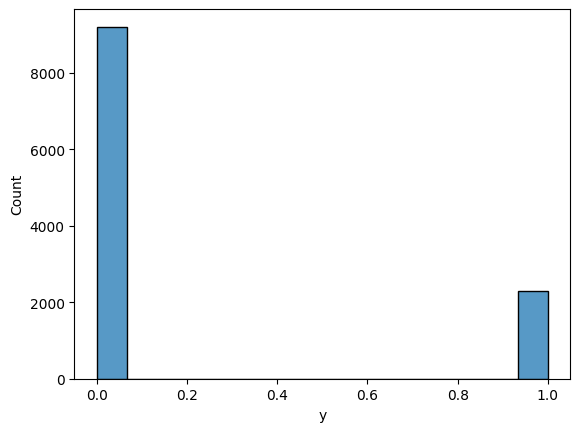

In [3]:
cols = ESR.columns
tgt = ESR.y
tgt[tgt > 1] = 0

ax = sns.histplot(tgt, label="Count")
non_seizure, seizure = tgt.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

As we can see, there 178 EEG features and 5 possible classes. The main goal of the dataset it's to be able to correctly identify epileptic seizures from EEG data, so a binary classification between classes of label 1 and the rest (2,3,4,5). In order to train our model, let's define our independent variable (X) and our dependent variable (y)

## Data Preprocessing


In [4]:
# 1. Checking Missing Data
ESR.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [5]:
tgt.info()

<class 'pandas.core.series.Series'>
RangeIndex: 11500 entries, 0 to 11499
Series name: y
Non-Null Count  Dtype
--------------  -----
11500 non-null  int64
dtypes: int64(1)
memory usage: 90.0 KB


## Exploratory Data Analysis

In [6]:
ESR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [7]:
ESR.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,1.000000


In [8]:
X = ESR.iloc[:, 1:179].values
X.shape

(11500, 178)

Text(0.5, 0, 'Samples')

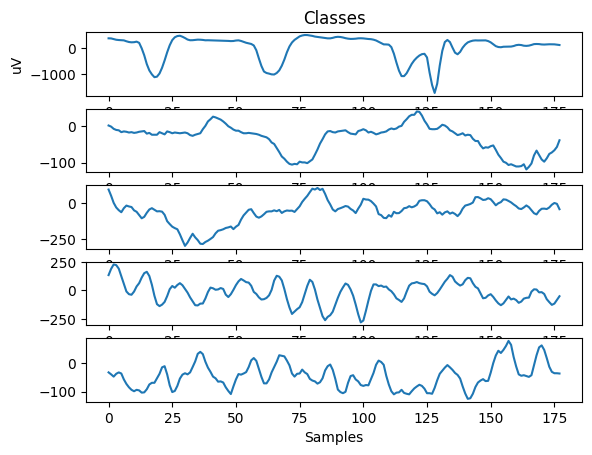

In [9]:
plt.subplot(511)
plt.plot(X[1, :])
plt.title("Classes")
plt.ylabel("uV")
plt.subplot(512)
plt.plot(X[7, :])
plt.subplot(513)
plt.plot(X[12, :])
plt.subplot(514)
plt.plot(X[0, :])
plt.subplot(515)
plt.plot(X[2, :])
plt.xlabel('Samples')

In [10]:
y = ESR.iloc[:, 179].values
y

array([0, 1, 0, ..., 0, 0, 0])

In [11]:
y[y > 1] = 0
y

array([0, 1, 0, ..., 0, 0, 0])

## Building Machine Learning Models

In [13]:
# splittig the dataset into the training set and test set

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
## Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
### 1. Logistic Regression

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test) 
acc_log_reg = round(clf.score(X_train, y_train) * 100, 2)
print(str(acc_log_reg) + ' %')

82.45 %


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
### 2. Support Vector Machine(SVM)

from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print(str(acc_svc) + '%')

98.26%


In [21]:
### Linear SVM
from sklearn.svm import SVC, LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print(str(acc_linear_svc) + '%')

82.27%


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [22]:
### 3. k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print(str(acc_knn) + '%')

93.88%


In [23]:
### 4. Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print(str(acc_gnb) + '%')

95.75%


In [24]:
### 5. Artificial Neural Network
import keras
from keras.models import Sequential
from keras.layers import Dense

In [28]:
## Building a model architecture
classifier = Sequential()
classifier.add(Dense(units=80, activation='relu', input_dim=178))
classifier.add(Dense(units = 80, activation='relu'))
classifier.add(Dense(units = 1, activation='sigmoid'))

## Compiling the ANN
classifier.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

## Fitting the ANN to the training set
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
920/920 [==============================] - 6s 4ms/step - loss: 0.2045 - accuracy: 0.9429
Epoch 2/100
920/920 [==============================] - 2s 2ms/step - loss: 0.0944 - accuracy: 0.9714
Epoch 3/100
920/920 [==============================] - 2s 2ms/step - loss: 0.0672 - accuracy: 0.9778
Epoch 4/100
920/920 [==============================] - 2s 2ms/step - loss: 0.0621 - accuracy: 0.9796
Epoch 5/100
920/920 [==============================] - 2s 3ms/step - loss: 0.0515 - accuracy: 0.9839
Epoch 6/100
920/920 [==============================] - 2s 2ms/step - loss: 0.0457 - accuracy: 0.9858
Epoch 7/100
920/920 [==============================] - 2s 2ms/step - loss: 0.0381 - accuracy: 0.9875
Epoch 8/100
920/920 [==============================] - 3s 3ms/step - loss: 0.0386 - accuracy: 0.9875
Epoch 9/100
920/920 [==============================] - 5s 6ms/step - loss: 0.0358 - accuracy: 0.9897
Epoch 10/100
920/920 [==============================] - 4s 4ms/step - loss: 0.0273 - accura

In [32]:
acc_ANN = classifier.evaluate(X_train, y_train)[1]
acc_ANN

288/288 [==============================] - 1s 2ms/step - loss: 0.0124 - accuracy: 0.9974


0.9973912835121155

In [29]:
# predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
print(classifier.evaluate(X_test, y_test))

72/72 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.9687
[0.31120631098747253, 0.9686956405639648]


## Principal Component Analysis(PCA)

In [30]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
acc_PCA = round(pca.score(X_train, y_train))
print(str(acc_PCA) + '%')

90%


## Comparing Models

In [33]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'ANN', 'KNN', 'Naive Bayes', 'PCA'],
    'Score': [acc_log_reg, acc_svc, acc_ANN, acc_knn, acc_gnb, acc_PCA]
})
models

,Model,Score
0,Logistic Regression,82.450000
1,Support Vector Machine,98.260000
2,ANN,0.997391
3,KNN,93.880000
4,Naive Bayes,95.750000
5,PCA,90.000000


In [35]:
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Support Vector Machine,98.260000
4,Naive Bayes,95.750000
3,KNN,93.880000
5,PCA,90.000000
0,Logistic Regression,82.450000
2,ANN,0.997391
